# PROBLEM STATEMENT

You have been hired as a consultant to a start-up that is running a targetted marketing ads on facebook. The company wants to anaylze customer behaviour by predicting which customer clicks on the advertisement. Customer data is as follows:

Inputs:
- Name
- e-mail
- Country
- Time on Facebook
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)



# STEP #0: LIBRARIES IMPORT


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [190]:
# Read the data using pandas dataframe

dataset = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [191]:
# Show the data head!

dataset.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [192]:
# Show the data tail!

dataset.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


# STEP #2: EXPLORE/VISUALIZE DATASET

In [193]:
# Check for missing data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


1    250
0    249
Name: Clicked, dtype: int64

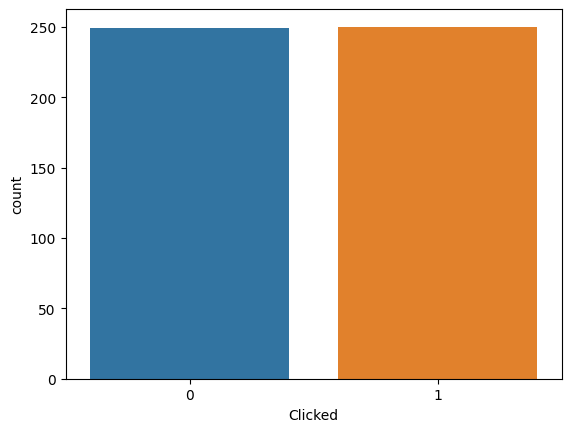

In [194]:
# Check click counts

sns.countplot(x = 'Clicked', data = dataset)
dataset['Clicked'].value_counts()

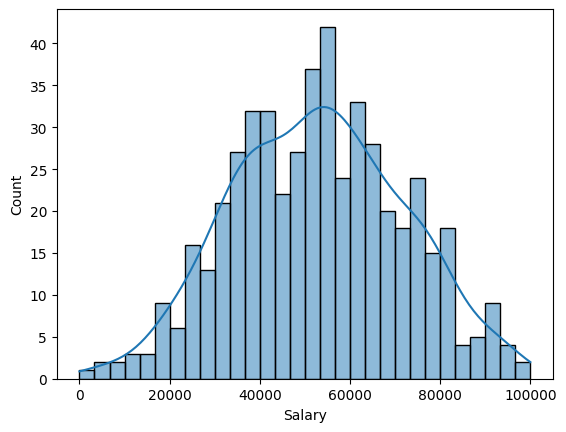

In [195]:
# Check Salary Distribution via Histogram

#dataset['Salary'].plot.hist(bins = 30)
#plt.hist(dataset['Salary'], bins = 30)
sns.histplot(dataset['Salary'], bins = 30, kde = True)
#dataset['Salary'].plot(kind = 'hist', bins = 30)
plt.show()

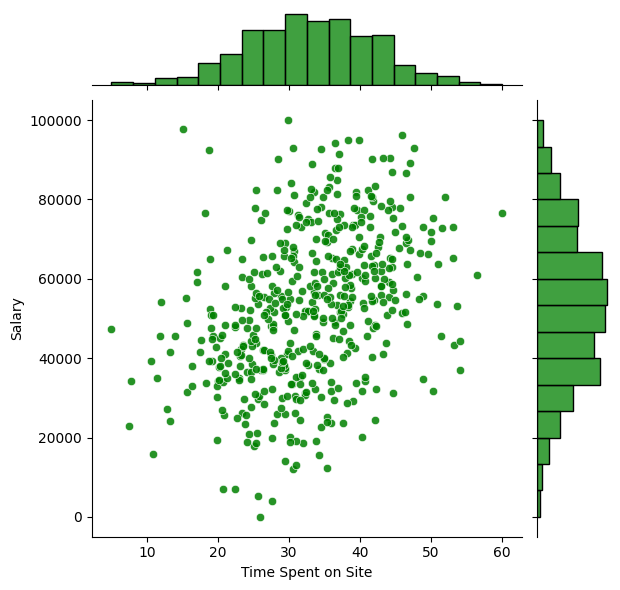

In [196]:
# Check JointPlot (Time Spent vs. Salary)

sns.jointplot(x = 'Time Spent on Site', y = 'Salary', data = dataset, alpha = 0.85, color = 'green')

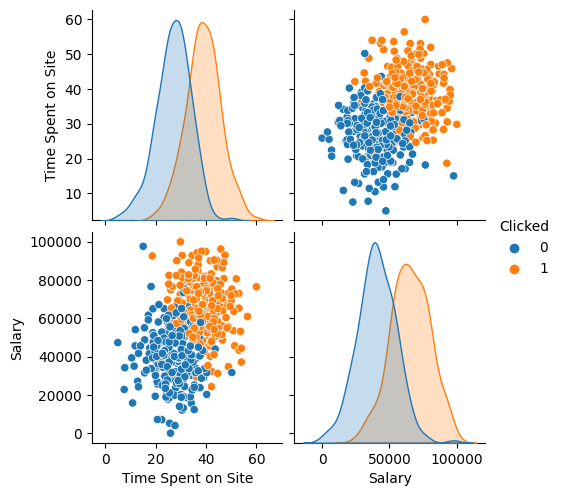

In [197]:
# Check A PairPlot (Clicked)

sns.pairplot(data = dataset, hue = 'Clicked')
plt.show()

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING

In [198]:
dataset.head(3)

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0


In [199]:
#Let's drop the emails, country and names (we can make use of the country later!)

new_data = dataset.drop(['Names', 'emails', 'Country'], axis = 1)

In [200]:
new_data.head()

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0


In [201]:
#Let's drop the target coloumn before we do train test split

X = new_data.drop('Clicked', axis = 1)
y = new_data['Clicked']

In [202]:
# Feature Scaling/Normalization

from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: MODEL TRAINING

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [205]:
# X_train

X_train

array([[ 1.42362615e+00,  2.28294560e+00],
       [ 1.27842887e+00,  6.42418929e-01],
       [ 9.38760851e-01,  1.21381549e+00],
       [ 5.41314780e-01,  2.60639388e-01],
       [ 1.09531908e+00,  4.75030899e-01],
       [-1.31149405e+00, -8.81682059e-01],
       [ 3.95482032e-01,  1.85281787e+00],
       [ 1.23876495e+00,  6.50963986e-01],
       [ 3.93751298e-01, -2.41424855e-01],
       [-2.40764550e-01, -3.10185529e-01],
       [ 1.24585679e+00,  1.41180492e+00],
       [-7.96458904e-01, -1.21483411e+00],
       [-9.34969620e-01, -1.70625532e-01],
       [ 8.55264296e-01, -9.81324726e-01],
       [-1.91132465e-01,  4.15148736e-01],
       [-1.10130678e+00, -9.69857225e-01],
       [ 1.29105293e+00,  1.18761807e+00],
       [-5.13376111e-01,  2.30822516e-01],
       [ 1.50793876e+00,  5.77561928e-01],
       [-1.58972467e-01, -1.50307162e+00],
       [-8.42943155e-01, -4.29119606e-01],
       [ 3.71283295e-01, -1.24101139e+00],
       [-1.50339446e+00, -3.88461766e-01],
       [-1.

In [206]:
# y_train

y_train

107    1
428    1
71     1
473    0
6      1
      ..
323    0
192    0
117    0
47     0
172    1
Name: Clicked, Length: 399, dtype: int64

In [207]:
# Fitting Logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

# STEP#5: MODEL TESTING

In [208]:
prediction = model.predict(X_test)
prediction

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

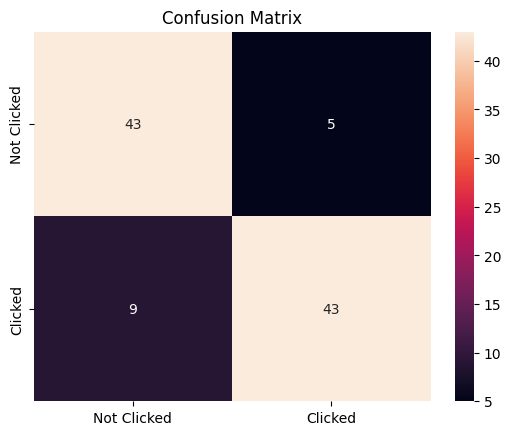

In [209]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix

cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = ['Not Clicked', 'Clicked'], yticklabels = ['Not Clicked', 'Clicked']).set(title = 'Confusion Matrix')
plt.show()

In [210]:
# Classification Report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100

